In [9]:
import numpy as np
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt
from math import pi

Solve \begin{cases}
-u''(x) + u'(x)-u(x)=\cos(x) \\
u(- \pi) = u(\pi)
\end{cases}

via FFT

Expand $u(x) = \sum_{k \in \mathbb{Z}} \hat{u}_{k} e^{i k x}$ where the wavenumber $k$ is actually $\frac{2 k \pi}{P}$, $P=(b-a) = 2 \pi$

By comparing Fourier coefficients: $$\hat{u}_k = \frac{\hat{f}_k}{k^2 + i k - 1}, \quad k \in \mathbb{Z}$$

Recall that by using FFT routine, the wavenumbers are ordered as $$[0, \ldots, \frac{N}{2} - 1,- \frac{N}{2},\ldots, -1]$$

In [10]:
P = 2*pi


def fourier(M,f):
    x = np.linspace(-pi, pi, M + 1)
    x = x[0:-1] #remove last point
    L = len(x) #it's M
    ind_k = np.array([i for i in range(0, L//2)] + [i for i in range(-L//2, 0)])
    denom = np.square(2*ind_k*pi/P) + 1j*ind_k - 1
    fhat = fft(f(x))
    uhat = fhat/denom
    u = np.real(ifft(uhat))
    return x, u

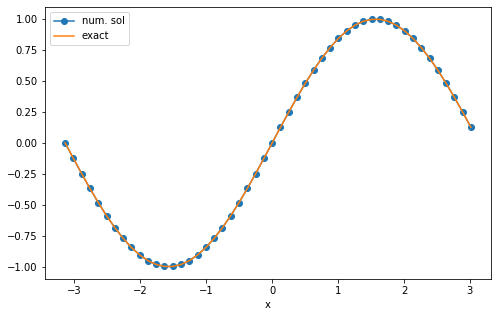

In [11]:
M = 50


def f(x):
    return np.cos(x)


x, u = fourier(M,f)
plt.figure(figsize=(8,5))
plt.plot(x,u,'-o',label='num. sol')
plt.plot(x,np.sin(x),'-',label='exact')
plt.xlabel('x')
plt.legend()